# Partie 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import binom
from itertools import product

In [4]:
# 1. Définition des équations de Lotka-Volterra
def lotka_volterra(x, y, alpha, beta, delta, gamma):
    dx = alpha * x - beta * x * y
    dy = delta * x * y - gamma * y
    return dx, dy

In [5]:
def euler_method(x0, y0, alpha, beta, delta, gamma, dt, t_max):
    steps = int(t_max / dt)
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    
    for i in range(1, steps):
        dx, dy = lotka_volterra(x[i-1], y[i-1], alpha, beta, delta, gamma)
        x[i] = x[i-1] + dx * dt
        y[i] = y[i-1] + dy * dt
    
    return x, y

In [6]:
# 3. Paramètrage
alpha = 0.1   # Taux de reproduction des proies
beta = 0.02   # Taux de prédation
delta = 0.01  # Taux de conversion nourriture en prédateurs
gamma = 0.1   # Taux de mortalité des prédateurs

x0, y0 = 40, 9  # Conditions initiales
dt = 0.1        # Pas de temps
t_max = 200     # Temps total

x, y = euler_method(x0, y0, alpha, beta, delta, gamma, dt, t_max)

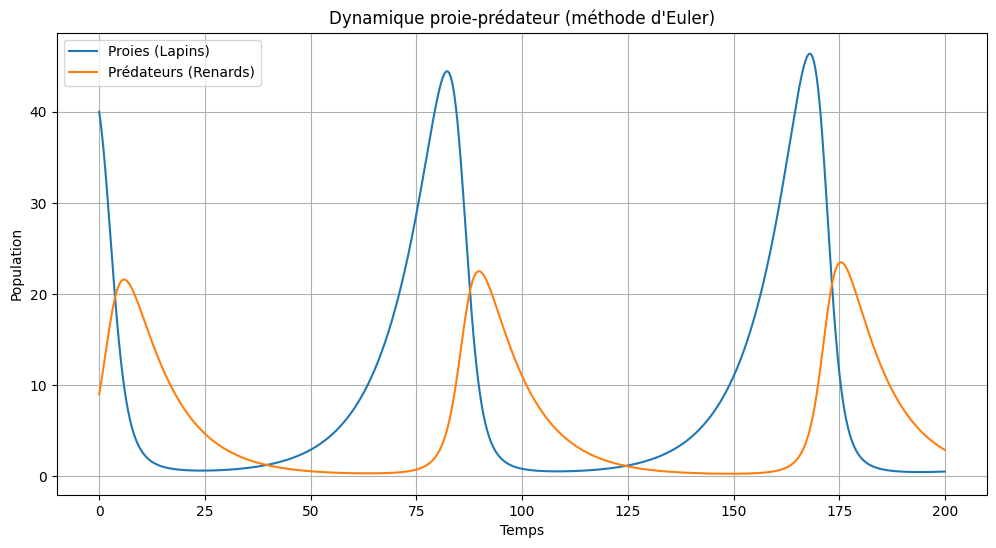

In [7]:
# PLOT 
time = np.arange(0, t_max, dt)
plt.figure(figsize=(12, 6))
plt.plot(time, x, label='Proies (Lapins)')
plt.plot(time, y, label='Prédateurs (Renards)')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Dynamique proie-prédateur (méthode d\'Euler)')
plt.legend()
plt.grid(True)
plt.show()

# Partie 2

In [ ]:
# Chargement des données 
df = pd.read_csv("populations_lapins_renards.csv")
prey_real = df["lapin"].values
predator_real = df["renard"].values
time_real = np.arange(len(prey_real)) 

In [ ]:
# Fonctions Lotka-Volterra et Euler
def lotka_volterra(x, y, alpha, beta, delta, gamma):
    dx = alpha * x - beta * x * y
    dy = delta * x * y - gamma * y
    return dx, dy

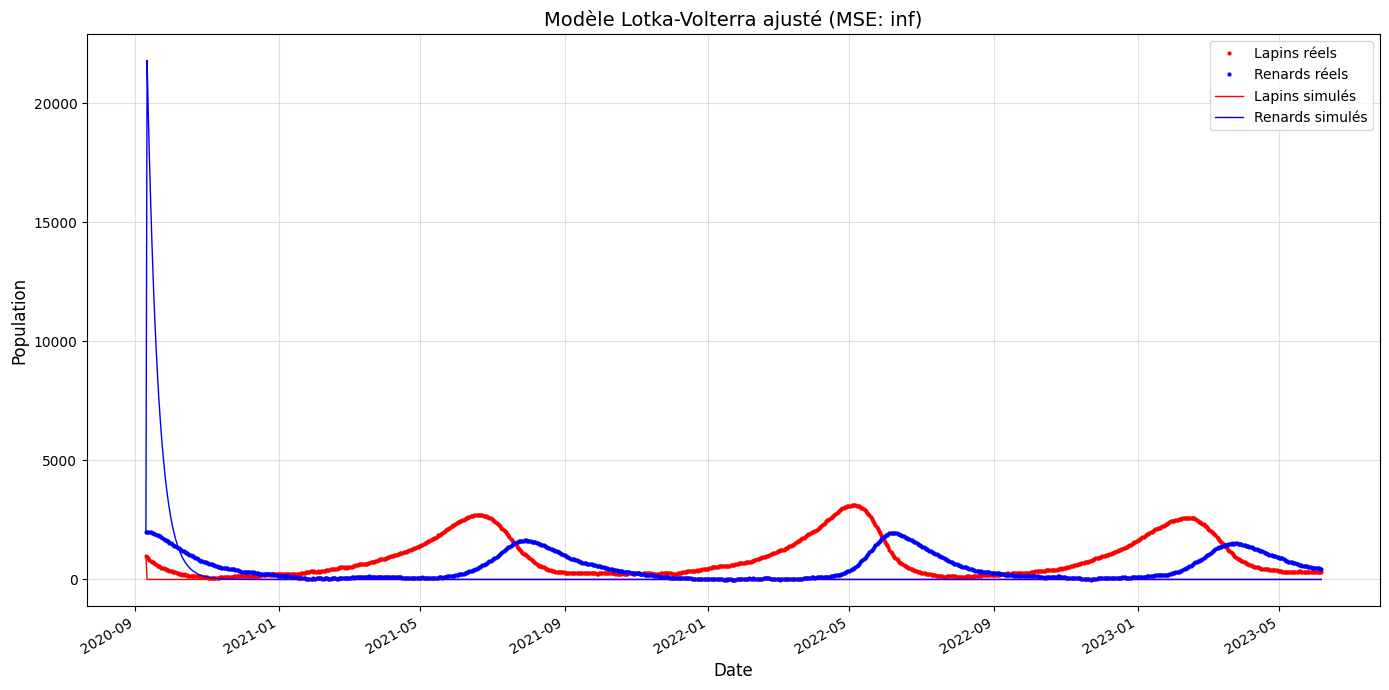

In [24]:
# Grid Search optimisé avec gestion des erreurs
param_grid = {
    'alpha': [0.1, 0.2, 0.3],      
    'beta': [0.01, 0.02, 0.03],
    'delta': [0.01, 0.02, 0.03],
    'gamma': [0.1, 0.2, 0.3]
}

best_mse = float('inf')
best_params = (0.1, 0.02, 0.01, 0.1)  

# ---------------------------
def euler_method(x0, y0, alpha, beta, delta, gamma, dt, t_max):
    steps = t_max
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    
    for i in range(1, steps):
        try:
            dx = alpha * x[i-1] - beta * x[i-1] * y[i-1]
            dy = delta * x[i-1] * y[i-1] - gamma * y[i-1]
            
            # Clipping pour éviter les valeurs négatives
            x[i] = max(x[i-1] + dx * dt, 0)
            y[i] = max(y[i-1] + dy * dt, 0)
            
            # Gestion des overflow
            if np.isnan(x[i]) or np.isnan(y[i]):
                return None, None
                
        except:
            return None, None
    
    return x, y


def compute_mse(alpha, beta, delta, gamma):
    x_sim, y_sim = euler_method(
        prey_real[0], 
        predator_real[0], 
        alpha, beta, delta, gamma, 
        dt=1, 
        t_max=len(prey_real)
    )
    
    if x_sim is None:  # Simulation invalide
        return float('inf')
    
    mse_prey = np.mean((x_sim - prey_real)**2)
    mse_pred = np.mean((y_sim - predator_real)**2)
    return (mse_prey + mse_pred) / 2

try:
    alpha_opt, beta_opt, delta_opt, gamma_opt = best_params
    
    # Simulation
    x_opt, y_opt = euler_method(
        prey_real[0], 
        predator_real[0], 
        alpha_opt, 
        beta_opt, 
        delta_opt, 
        gamma_opt, 
        dt=1, 
        t_max=len(prey_real))
    
    if x_opt is not None:
        # Conversion des dates
        dates = pd.to_datetime(df['date'])  
        
  
        plt.figure(figsize=(14, 7))
        

        plt.plot(dates, prey_real, 'ro', markersize=2, label='Lapins réels')
        plt.plot(dates, predator_real, 'bo', markersize=2, label='Renards réels')
        

        plt.plot(dates, x_opt, 'r-', linewidth=1, label='Lapins simulés')
        plt.plot(dates, y_opt, 'b-', linewidth=1, label='Renards simulés')
        

        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Population', fontsize=12)
        plt.title(f'Modèle Lotka-Volterra ajusté (MSE: {best_mse:.2e})', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.gcf().autofmt_xdate()  
        plt.grid(alpha=0.4)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    else:
        print("Erreur: Simulation échouée")

except Exception as e:
    print(f"Erreur lors de la visualisation: {str(e)}")